In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
matplotlib.rcParams.update({'font.size': 12})
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import time
# T0 = time.time()
# print(time.time()-T0)

In [32]:
'cosmological constants'
global z_pk, Omega_b, Omega_m, n_s, k_ev, n
z_pk = 1.0
Omega_b = 0.049
Omega_m = 0.3175
n_s = 0.9624

def Pklinear(p):
    # T0 = time.time()
    from classy import Class
    k_min = 0.10000E-02
    k_max = 0.10000E+02
    (h, Omega_cdm, Mnu, lnAs, N_eff)= p
    nuCDM = Class()
    params = {'Omega_b':Omega_b, 'Omega_m':Omega_m, 'h':h, 'ln10^{10}A_s':lnAs, 'n_s':n_s, 
              'N_ncdm':1,'m_ncdm':Mnu, 'N_eff':3.046,
            #   'tau_reio':0.09,'YHe':0.24,
              'output':'mPk','z_pk':z_pk,'P_k_max_1/Mpc':k_max}
    nuCDM.set(params)
    nuCDM.compute()
    kk = np.logspace(np.log10(k_min), np.log10(k_max), num = 312) #Mpc^-1
    Pk=[]
    for k in kk:
        Pk.append([k, nuCDM.pk_cb(k*nuCDM.h(),z_pk)*nuCDM.h()**3])
    nuCDM.empty()
    # print('linear cb Pk: ',time.time()-T0)
    Pk = np.array(Pk).T
    return Pk

In [33]:
"""""
CLASSS_m04_cb_params.ini
temp_cmb = 2.7255
massless_neutrinos = 2.046
massive_neutrinos = 1
massive_nu_approx = 1
""""" 

pth = [0.6711, 0.3175, 0, 3.1247, 3.046]
Pk_th = Pklinear(pth)
Pk_mu = []

dMnu = [0.0, 0.1, 0.2, 0.4]
for i,n in enumerate(dMnu):
    params = [0.6711, Omega_m, n, 3.1247, 3.046]
    Pk_mu.append(Pklinear(params))
    print(n)

0.0
0.1
0.2
0.4


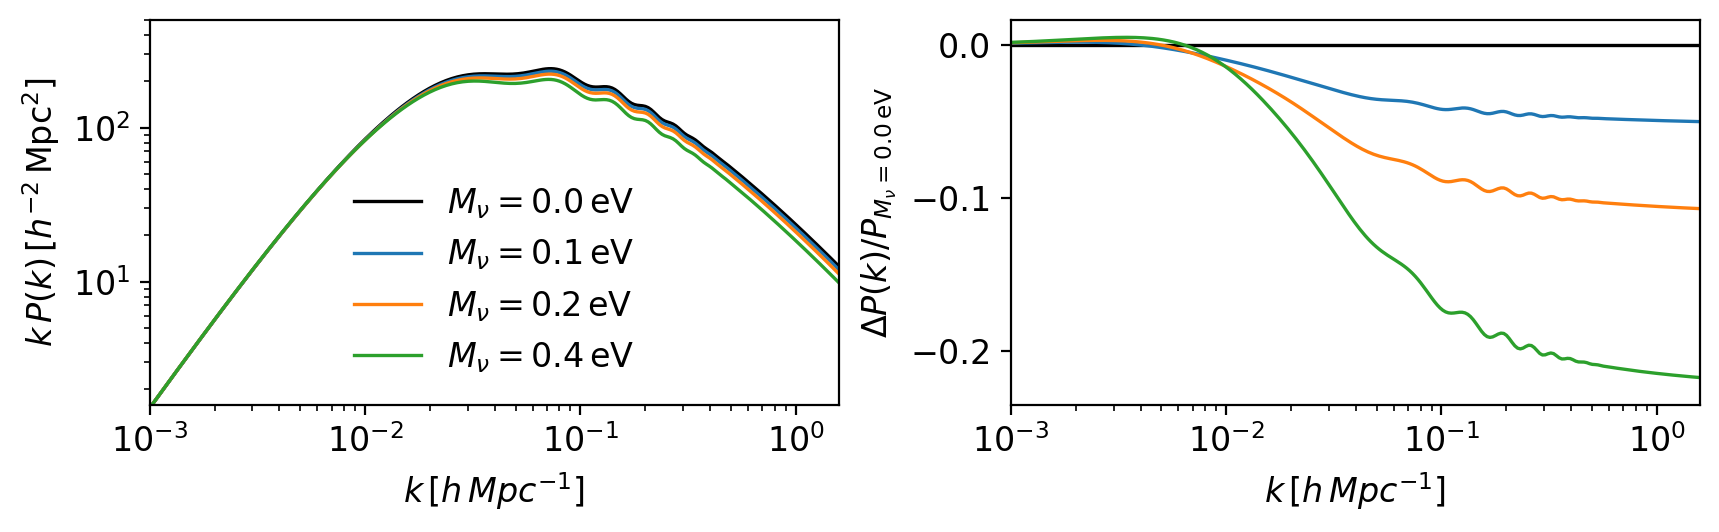

In [57]:
fig, axs = plt.subplots(1, 2,figsize=(10,2.5), sharex=True)
fig.subplots_adjust(wspace=0.25)

dMnu = [0.0, 0.1, 0.2, 0.4]
colors = ['black','C0','C1','C2']
labels = [r'$ M_\nu = 0.0 \, \rm{eV}$', r'$ M_\nu = 0.1 \, \rm{eV}$', r'$ M_\nu = 0.2 \, \rm{eV}$', r'$ M_\nu = 0.4 \, \rm{eV}$']
for i,n in enumerate(dMnu):
    params = [0.6711, 0.258964, n, 3.311521, 2.046]
    axs[0].plot(Pk_mu[i][0],Pk_mu[i][0]*Pk_mu[i][1],label=labels[i],color=colors[i], lw = 1.2)
    axs[1].plot(Pk_mu[i][0],(Pk_mu[i][1]-Pk_th[1])/Pk_th[1],label=f"Mnu = {n} eV",color=colors[i], lw = 1.2)
# axs[0].set_title(f'Linear cb Pk at {z_pk}')
axs[0].set_xlabel(r'$k \, [h\, Mpc^{-1}]$')
axs[0].set_ylabel(r'$k \, P(k) \, [h^{-2} \,  \rm{Mpc}^2]$', fontsize=12)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylim([10**(0.2),10**(2.7)])
axs[0].set_xlim([10**(-3),10**(0.2)])
leg1=axs[0].legend(loc='best', fontsize=12)
leg1.get_frame().set_linewidth(0.0)
axs[1].set_xlabel(r'$k \, [h\, Mpc^{-1}]$', fontsize=12)
axs[1].set_ylabel(r'$ \Delta P(k)/P_{M_{\nu}=0.0 \, \rm{eV}}$', fontsize=12)
axs[1].set_xscale('log')
# axs[1].legend()
plt.show()
# plt.savefig('Linear_cb_Pk_Mnu.png')
plt.close()

In [ ]:
pfig, axs = plt.subplots(1, 2,figsize=(14,5))
N_eff = 3.044
dNeff = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
colors = ['black','C0','C1','C2','C3','C4']
for i,n in enumerate(dNeff):
    params = [0.6711, 0.258964, 0, 3.311521, N_eff-n]
    Pk = Pklinear(params)
    axs[0].plot(Pk[0],Pk[0]*Pk[1],label=f"dNeff = {n}",color=colors[i])
    axs[1].plot(Pk[0],Pk[1]/Pk_th[1],label=f"dNeff = {n}",color=colors[i])
axs[0].set_title(f'Linear cb Pk at {z_pk}')
axs[0].set_xlabel(r'$k \, [h\, Mpc^{-1}]$')
axs[0].set_ylabel(r'$P(k) \, [h^{-1} \,  Mpc]^2$')
axs[0].set_xscale('log')
axs[0].legend()
axs[1].set_title(f'Linear cb Pk at {z_pk}')
axs[1].set_xlabel(r'$k \, [h\, Mpc^{-1}]$')
axs[1].set_ylabel(r'$P(k)/P(k)(N_{eff}=3.044)  \,  [h^{-1} \,  Mpc]^2$')
axs[1].set_xscale('log')
axs[1].legend()
# plt.savefig('Linear_cb_Pk_Neff.png')
plt.close()
